In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import bokeh
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.iris import flowers
from bokeh.transform import factor_cmap, factor_mark
from bokeh.io import output_notebook
import ipywidgets

import data_exploration as file_de

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ericw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ericw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Import the dataset
vgsales = pd.read_csv('vgsales.csv')
video_game_sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
game_reviews = pd.read_csv('metacritic_critic_reviews.csv')

#Looks like Vel changed the format of some fields because of some issues, so I keep this for our benefit
video_game_sales = video_game_sales.replace('tbd', np.nan)
video_game_sales["User_Score"] = video_game_sales.User_Score.astype(float)
vgsales['Name'] = vgsales['Name'].str.lower()
unique_vgsales = vgsales.groupby(['Name','Platform']).count()
unique_vgsales.reset_index(drop = False, inplace = True)
unique_vgsales = unique_vgsales.iloc[:,0:2]
print(unique_vgsales.shape)
video_game_sales['Name'] = video_game_sales['Name'].str.lower()
unique_video_game_sales = video_game_sales.groupby(['Name','Platform']).count()
unique_video_game_sales.reset_index(drop = False, inplace = True)
unique_video_game_sales = unique_video_game_sales.iloc[:,0:2]
print(unique_video_game_sales.shape)
unique_video_game_sales.head()
#Change the platform format in game_reviews to make them aligned with the other two tables
game_reviews.replace("PlayStation 4", "PS4", inplace=True)
game_reviews.replace("PlayStation Vita", "PSV", inplace=True)
game_reviews.replace("Wii U", "WiiU", inplace=True)
game_reviews.replace("Xbox One", "XOne", inplace=True)
#Get the unique game names from game_reviews
game_reviews['game'] = game_reviews['game'].str.lower()
unique_game_reviews = game_reviews.groupby(['game','platform']).count()
unique_game_reviews.reset_index(drop = False, inplace = True)
unique_game_reviews = unique_game_reviews.iloc[:,0:2]
print(unique_game_reviews.shape)
unique_game_reviews.head()

(16593, 2)
(16713, 2)
(5516, 2)


,game,platform
0,#idarb,XOne
1,.hack//g.u. last recode,PC
2,.hack//g.u. last recode,PS4
3,0rbitalis,PC
4,1-2-switch,Switch


In [3]:
#Merge game_reviews to vgsales and video_game_sales by the game names
test_merge1 = pd.merge(unique_game_reviews, unique_vgsales, left_on='game', right_on='Name', how='inner')
test_merge2 = pd.merge(unique_game_reviews, unique_video_game_sales, left_on='game', right_on='Name', how='inner')

You can see that after merging by just the game names, we can still get 700+ rows. If we also consider the platforms and number of reviews for each game, there will be more rows that we could get.

In [4]:
test_merge3 = pd.merge(game_reviews, video_game_sales, left_on=['game', 'platform'], right_on=['Name','Platform'], how='inner')
ideal_df = test_merge3.drop(columns=['Name', 'Platform'])
ideal_df.tail(3)

,name,review,game,platform,score,date,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
32776,Worth Playing,Ride 2 is certainly an improvement over the or...,ride 2,XOne,65.0,"Mar 9, 2017",2016.0,Racing,Milestone S.r.l,0.0,0.01,0.0,0.0,0.01,NaN,NaN,8.2,6.0,Milestone S.r.l,E
32777,TrueAchievements,"Despite the addition of more bikes and tracks,...",ride 2,XOne,60.0,"Oct 13, 2016",2016.0,Racing,Milestone S.r.l,0.0,0.01,0.0,0.0,0.01,NaN,NaN,8.2,6.0,Milestone S.r.l,E
32778,GameSpot,"On paper, then, Ride 2 is an exciting proposit...",ride 2,XOne,40.0,"Feb 24, 2017",2016.0,Racing,Milestone S.r.l,0.0,0.01,0.0,0.0,0.01,NaN,NaN,8.2,6.0,Milestone S.r.l,E


This cell below is just for testing the some plotting function to see how Colab works it out

In [5]:
output_notebook()
SPECIES = [
    'Action', 'Adventure', 'Fighting', 'Misc', 
    'Platform', 'Puzzle', 'Racing', 'Role-Playing', 
    'Shooter', 'Simulation', 'Sports', 'Strategy']
MARKERS = [
    'asterisk', 'circle', 'cross', 'dash',
    'diamond_dot', 'hex', 'inverted_triangle', 'plus', 
    'square','square_pin', 'circle_x', 'triangle_pin']

p = figure(title = "Genres and their Metacritics", background_fill_color="#fafafa", plot_width=700, plot_height=700)
p.xaxis.axis_label = 'Critic Score (Max: 100)'
p.yaxis.axis_label = 'User Score (Max: 10)'

p.scatter("Critic_Score", "User_Score", source=video_game_sales, legend="Genre", 
          fill_alpha=0.4, size=5,
          marker=factor_mark('Genre', MARKERS, SPECIES),
          color=factor_cmap('Genre', 'Category20_12', SPECIES))

show(p)

Loading BokehJS ...

In [6]:
# test_merge3_cleaned[(test_merge3_cleaned['game'].str.contains("fallout")) & (test_merge3_cleaned['score'] > 70.0) & (test_merge3_cleaned['score'] < 90.0)]
fallout_franchise_df = ideal_df[ideal_df['game'].str.contains("fallout")]
fallout_franchise_df

,name,review,game,platform,score,date,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
18546,TrueAchievements,The game's music is perfectly set for the diff...,fallout 4,XOne,100.0,"Dec 16, 2015",2015.0,Role-Playing,Bethesda Softworks,2.51,1.32,0.01,0.38,4.22,88.0,39.0,6.2,1749.0,Bethesda Game Studios,M
18547,Gamestyle,Fallout 4 is my game of the year for 2015 and ...,fallout 4,XOne,100.0,"Dec 3, 2015",2015.0,Role-Playing,Bethesda Softworks,2.51,1.32,0.01,0.38,4.22,88.0,39.0,6.2,1749.0,Bethesda Game Studios,M
18548,The Daily Dot,I have spent more than 60 hours in the Xbox On...,fallout 4,XOne,100.0,"Nov 9, 2015",2015.0,Role-Playing,Bethesda Softworks,2.51,1.32,0.01,0.38,4.22,88.0,39.0,6.2,1749.0,Bethesda Game Studios,M
18549,Gaming Age,The biggest and most important thing to discus...,fallout 4,XOne,100.0,"Nov 9, 2015",2015.0,Role-Playing,Bethesda Softworks,2.51,1.32,0.01,0.38,4.22,88.0,39.0,6.2,1749.0,Bethesda Game Studios,M
18550,AusGamers,Fallout 4 is a game that will spark conversati...,fallout 4,XOne,100.0,"Nov 9, 2015",2015.0,Role-Playing,Bethesda Softworks,2.51,1.32,0.01,0.38,4.22,88.0,39.0,6.2,1749.0,Bethesda Game Studios,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,Washington Post,Fallout 4 is best appreciated over time. Play ...,fallout 4,PC,70.0,"Nov 12, 2015",2015.0,Role-Playing,Bethesda Softworks,0.51,0.67,0.00,0.10,1.29,84.0,38.0,5.4,7512.0,Bethesda Game Studios,M
20085,GameCritics,In a year when games like The Witcher 3: Wild ...,fallout 4,PC,70.0,"Nov 9, 2015",2015.0,Role-Playing,Bethesda Softworks,0.51,0.67,0.00,0.10,1.29,84.0,38.0,5.4,7512.0,Bethesda Game Studios,M
20086,Quarter to Three,Bethesda has laid solid and at times spectacul...,fallout 4,PC,60.0,"Nov 19, 2015",2015.0,Role-Playing,Bethesda Softworks,0.51,0.67,0.00,0.10,1.29,84.0,38.0,5.4,7512.0,Bethesda Game Studios,M
20087,CNET,Brimming with an astonishing amount of detail ...,fallout 4,PC,NaN,"May 5, 2016",2015.0,Role-Playing,Bethesda Softworks,0.51,0.67,0.00,0.10,1.29,84.0,38.0,5.4,7512.0,Bethesda Game Studios,M


Word: 4 ; Occurrence: 111
Word: Fallout ; Occurrence: 111
Word: game ; Occurrence: 73
Word: world ; Occurrence: 44
Word: Bethesda ; Occurrence: 30
Word: like ; Occurrence: 26
Word: 3 ; Occurrence: 23
Word: time ; Occurrence: 22
Word: RPG ; Occurrence: 20
Word: experience ; Occurrence: 19


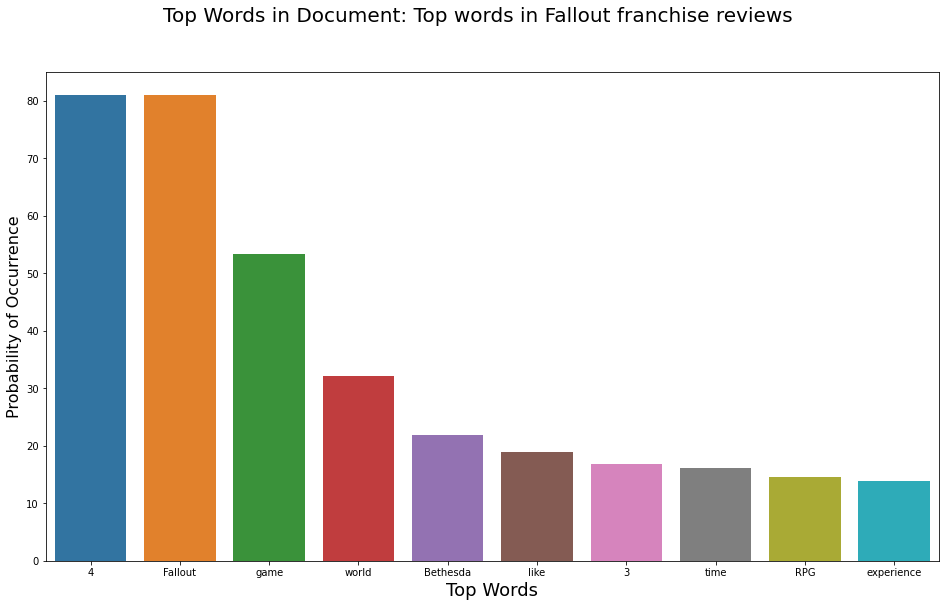

In [7]:
file_de.plot_top_words(fallout_franchise_df, 10, 16, 9, "Top words in Fallout franchise reviews", False)

# Reference this to get some visualizations going:
- https://github.com/davis68/SIIP_SP2021/blob/master/potential_assignment_materials/Week8/week8_data_viz_pt1.ipynb

## I will do this using a very small subset as a proof-of-concept

In [8]:
video_game_sales.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [9]:
just_fo_df = video_game_sales[video_game_sales["Name"].str.contains("fallout", na=False)]
just_wc_df = video_game_sales[video_game_sales["Name"].str.contains("warcraft", na=False)]
plt.clf()
irrelevant_options = ['Name', 'review', 'Platform','date','Genre', 'Publisher','Developer', 'Rating']

dropdown_options = [e for e in list(video_game_sales.columns) if e not in irrelevant_options]
dropdown_options.sort()

@ipywidgets.interact(column1 = dropdown_options, column2 = dropdown_options)
def get_quick_corrlations(column1 = 'EU_Sales', column2 = 'User_Score'):
    plt.figure(figsize=(13,5))
    plt.scatter(just_fo_df[column1], just_fo_df[column2], marker = 'o', color="green")
    plt.scatter(just_wc_df[column1], just_wc_df[column2], marker = 'o', color="orange")
    plt.xlabel(column1, fontsize=15)
    plt.ylabel(column2, fontsize=15)
    for label, x, y in zip(just_fo_df['Name'] + " - " + just_fo_df['Platform'], just_fo_df[column1], just_fo_df[column2]):
            plt.annotate(label, xy = (x, y))
    for label, x, y in zip(just_wc_df['Name'] + " - " + just_wc_df['Platform'], just_wc_df[column1], just_wc_df[column2]):
            plt.annotate(label, xy = (x, y))

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='column1', index=2, options=('Critic_Count', 'Critic_Score', 'EU_Sa…